# Bristol City Council Land and Building Assets challenge
## Unit 2 Problem Definition and Suggested Solutions
Google Colab Notebook

# Useful links
## Data source
https://www.data.gov.uk/dataset/a98345ad-7f4c-4f6e-882b-e631dc1cc046/bristol-city-council-land-and-building-assets

https://www.bristol.gov.uk/files/documents/7241-land-property-2023/file

## Programming
https://www.projectpro.io/recipes/explain-structtype-and-structfield-pyspark-databricks#:~:text=The%20StructField%20in%20PySpark%20represents,the%20name%20of%20the%20StructField

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.types.StructType.html#:~:text=.StructType%5Bsource%5D-,Construct%20a%20StructType%20by%20adding%20new%20elements%20to%20it%2C%20to,)%2C%20metadata(optional)

https://sparkbyexamples.com/pyspark/pyspark-read-csv-file-into-dataframe/

https://sparkbyexamples.com/pyspark/pyspark-sql-date-and-timestamp-functions/

https://spark.apache.org/examples.html and https://github.com/apache/spark/tree/master/examples/src/main/python


## Mount Azure blob storage

We will mount up the data storage blob in Azure. Running this you will be asked for connection strings that will be given in class.

In [7]:
%%capture
%pip install mount-azure-blob==0.0.3

In [ ]:
from mount_azure_blob import mount_storage
mount_storage(mount_path="bdv-2024-05-09t15-59-02-855z", config_file=None)

# Install PySpark and dependencies

Unlike running the PySpark notebook on Azure, PySpark is not included by default in the CoLab notebook - so we can add that next.

In [8]:
#%%capture
!apt-get update # Update apt-get repository.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # Install Java.
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz # Download Apache Spark.
!tar xf spark-3.1.1-bin-hadoop3.2.tgz # Unzip the tgz file.
!pip install -q findspark # Install findspark. Adds PySpark to the System path during runtime.

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

# Initialize findspark
import findspark
findspark.init()

# Create a PySpark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://packages.microsoft.com/ubuntu/20.04/prod focal InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
bdv-2024-05-09t15-59-02-855z  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


## Load data

In [9]:
# Load CSV - can be from a standalone local file, or online file source - here is is from the Azure storage blob
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.types import DoubleType, BooleanType, DateType, LongType, FloatType
# Using custom schema
schema =  StructType() \
      .add("Organisation Name", StringType(), True) \
      .add("Organisation Code", StringType(), True) \
      .add("Effective Date", DateType(), True) \
      .add("UPRN", StringType(), True) \
      .add("Property ID", IntegerType(), True) \
      .add("Property Type", StringType(), True) \
      .add("Property Name/Address (Where no UPRN)", StringType(), True) \
      .add("Property Address Detail", StringType(), True) \
      .add("Secondary Address Detail", StringType(), True) \
      .add("Street Number", StringType(), True) \
      .add("Street", StringType(), True) \
      .add("Town / Post Town", StringType(), True) \
      .add("Post Code", StringType(), True) \
      .add("Ward", StringType(), True) \
      .add("Geo X (Easting)", LongType(), True) \
      .add("Geo Y (Northing)", LongType(), True) \
      .add("Tenure Type", StringType(), True) \
      .add("Ground Lease In", StringType(), True) \
      .add("Ground Lease Out", StringType(), True) \
      .add("Lease In to Council", StringType(), True) \
      .add("Lease Out", StringType(), True) \
      .add("Licence In to Council", StringType(), True) \
      .add("Licence Out", StringType(), True) \
      .add("Sub-lease In to Council", StringType(), True) \
      .add("Sub-lease Out", StringType(), True) \
      .add("Vacant", StringType(), True) \
      .add("Asset Type", StringType(), True) \
      .add("Building Size - GIA (M2)", FloatType(), True) \
      .add("Site Area (Hectares)", FloatType(), True) \
      .add("Occupied by Council / Direct Service Property", StringType(), True) \
      .add("Purpose / Asset Category", StringType(), True)

df = spark.read.format("csv") \
      .options(header="True", inferSchema="False", delimiter=",", dateFormat="d/M/yyyy") \
      .schema(schema) \
      .load("/content/bdv-2024-05-09t15-59-02-855z/HdiSamples/BristolCityCouncilLandAndBuildingAssets-2024.csv")

## Show schema

In [10]:
# We can check it all read in OK and as expected

# Show schema
df.printSchema()
# Show dataframe
df.show()
from IPython.display import display
display(df)

root
 |-- Organisation Name: string (nullable = true)
 |-- Organisation Code: string (nullable = true)
 |-- Effective Date: date (nullable = true)
 |-- UPRN: string (nullable = true)
 |-- Property ID: integer (nullable = true)
 |-- Property Type: string (nullable = true)
 |-- Property Name/Address (Where no UPRN): string (nullable = true)
 |-- Property Address Detail: string (nullable = true)
 |-- Secondary Address Detail: string (nullable = true)
 |-- Street Number: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Town / Post Town: string (nullable = true)
 |-- Post Code: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Geo X (Easting): long (nullable = true)
 |-- Geo Y (Northing): long (nullable = true)
 |-- Tenure Type: string (nullable = true)
 |-- Ground Lease In: string (nullable = true)
 |-- Ground Lease Out: string (nullable = true)
 |-- Lease In to Council: string (nullable = true)
 |-- Lease Out: string (nullable = true)
 |-- Licence In to 

DataFrame[Organisation Name: string, Organisation Code: string, Effective Date: date, UPRN: string, Property ID: int, Property Type: string, Property Name/Address (Where no UPRN): string, Property Address Detail: string, Secondary Address Detail: string, Street Number: string, Street: string, Town / Post Town: string, Post Code: string, Ward: string, Geo X (Easting): bigint, Geo Y (Northing): bigint, Tenure Type: string, Ground Lease In: string, Ground Lease Out: string, Lease In to Council: string, Lease Out: string, Licence In to Council: string, Licence Out: string, Sub-lease In to Council: string, Sub-lease Out: string, Vacant: string, Asset Type: string, Building Size - GIA (M2): float, Site Area (Hectares): float, Occupied by Council / Direct Service Property: string, Purpose / Asset Category: string]

In [11]:
# Register the dataframe as a virtual HIVE table to allow SparkSQL
#df.registerTempTable('BristolCouncilAssets') # depracated form of command, nopw replaced with ...
df.createOrReplaceTempView('BristolCouncilAssets')

# Problem 1
## How many ‘Properties’ are Bristol City Council (BCC) responsible for (as owner, user or manager)?



   We will use Spark SQL to query the data table registered above - it returns a Spark Dataframe which can be displayed with the show() command.

In [12]:
query = """
SELECT Count(*) AS Count
FROM BristolCouncilAssets
"""
spark.sql(query).show()

+-----+
|Count|
+-----+
| 3805|
+-----+



We can also show the same result as a pandas dataframe with the print command.

In [13]:
query = """
SELECT Count(*) AS Count
FROM BristolCouncilAssets
"""
print(spark.sql(query).toPandas())

   Count
0   3805


# Problem 2
## How many unique ‘Property Type’s are Bristol City Council (BCC) responsible for (as owner, user or manager)?


In [14]:
query = """
SELECT DISTINCT `Property Type`
FROM BristolCouncilAssets
ORDER BY `Property Type`
"""
spark.sql(query).show()

+--------------------+
|       Property Type|
+--------------------+
| Access/Right Of Way|
|Agricultural Buil...|
|Block/Blocks Of F...|
|      Bridge/Pontoon|
|         Bus Shelter|
|     Cafe/Restaurant|
|    Childrens Centre|
|     Childrens Homes|
|Church/Religious ...|
|  Civic Amenity Site|
| Club/Cinema/Theatre|
|Community Centre/...|
|              Courts|
|         Crematorium|
|          Day Centre|
|         Day Nursery|
|Drainage/Water Pi...|
|  E P Home/Dwellings|
|Energy Generation...|
|Field Study Centr...|
+--------------------+
only showing top 20 rows



The above output is broken down to show all the seperate property types - if we just want a total count then we can do as as shown below.


In [15]:
query = """
SELECT Count(*) AS Count
FROM (SELECT DISTINCT `Property Type` FROM BristolCouncilAssets) types
"""
spark.sql(query).show()

+-----+
|Count|
+-----+
|  108|
+-----+



# Problem 3
## How many properties are there in each of the ‘Property Types’?


We can use the ORDER BY in the Spark SQL to format the response as we want.

In [16]:
query = """
SELECT `Property Type`, Count(*) AS Count
FROM BristolCouncilAssets
GROUP BY `Property Type`
ORDER BY `Count` DESC
"""
spark.sql(query).show()

+--------------------+-----+
|       Property Type|Count|
+--------------------+-----+
|     Land-Open Space|  463|
|        Land-Amenity|  409|
|    Land-Residential|  321|
|Store/Depot/Wareh...|  198|
|          Land-Verge|  198|
|             Offices|  176|
|          Shop/Kiosk|  169|
|Land-Playingfield...|  149|
|      Primary School|  136|
|Land-Allotments-S...|  128|
| Land-Car/Lorry Park|   99|
|Garage/Garages/Ca...|   78|
|         Land-Garden|   72|
|Community Centre/...|   72|
| Industrial/Workshop|   70|
|        House/Houses|   52|
|Land-Quay/Marina/...|   48|
|    Land-Public Park|   44|
|    Land-Unused Land|   43|
|Sports Building/H...|   42|
+--------------------+-----+
only showing top 20 rows



# Problem 4
## Show a histogram classifying the total area (in Ha) of each of these 'property types'.


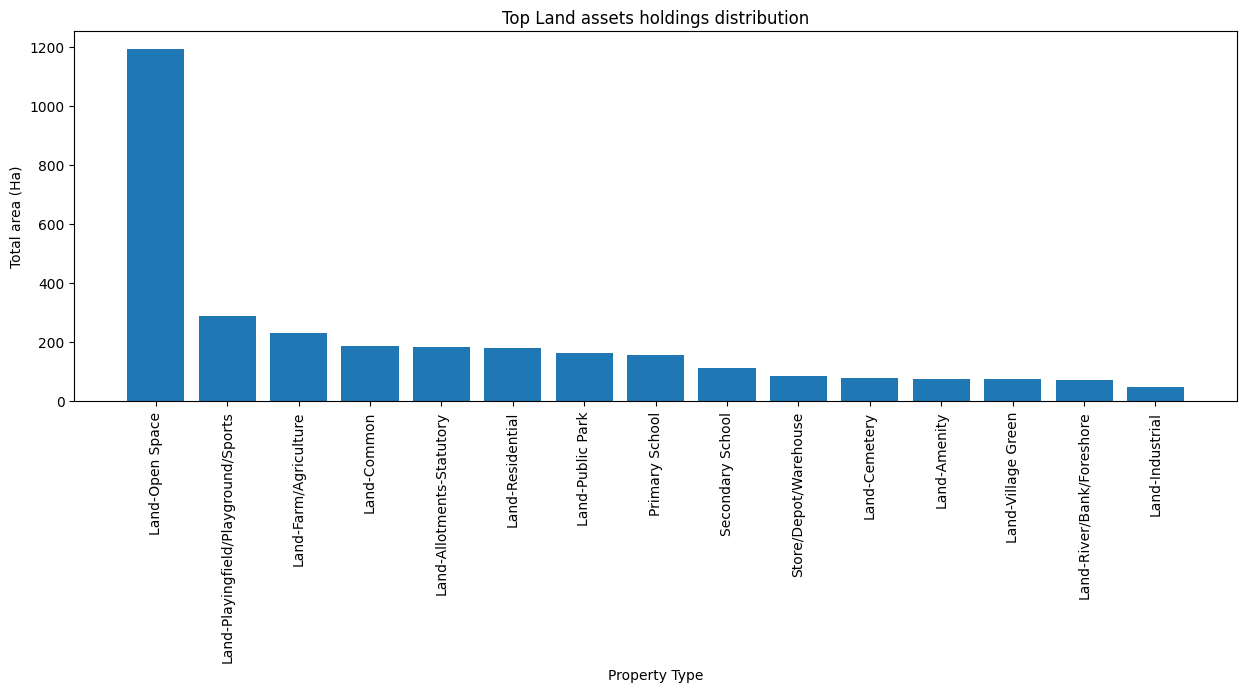

In [21]:
import matplotlib.pyplot as plt
query = """
SELECT `Property Type`, Sum(`Site Area (Hectares)`) AS Sum
FROM BristolCouncilAssets
GROUP BY `Property Type`
ORDER BY Sum(`Site Area (Hectares)`) DESC LIMIT 15
"""
propertytypes = spark.sql(query).toPandas() # now it is useful to convert to pandas
plt.figure(1).set_figwidth(15)
plt.title('Top Land assets holdings distribution')
plt.xlabel('Property Type')
plt.xticks(rotation=90)
plt.ylabel('Total area (Ha)')
plt.bar(propertytypes['Property Type'], propertytypes['Sum'])
plt.show()


Below is the same plot but now using the plot function of pandas, rather than one above that uses matplotlib directly. But the two graphs are different - can you tell why? Read the SQL statement above carefully. How can the df approach be adapted to show the same?

In [22]:
import pandas as pd
df_pd = df.toPandas().sort_values(by=['Site Area (Hectares)'], ascending=False).head(15)
print(df_pd[['Property Type', 'Site Area (Hectares)']].head(5))
print('\nCheck that df_pd is a pandas dataframe: ',isinstance(df_pd, pd.DataFrame))

        Property Type  Site Area (Hectares)
2143  Land-Open Space            298.963074
3195  Land-Open Space            120.896835
3516  Land-Open Space            107.810326
1342      Land-Common             83.876373
1184      Land-Common             80.328705

Check that df_pd is a pandas dataframe:  True


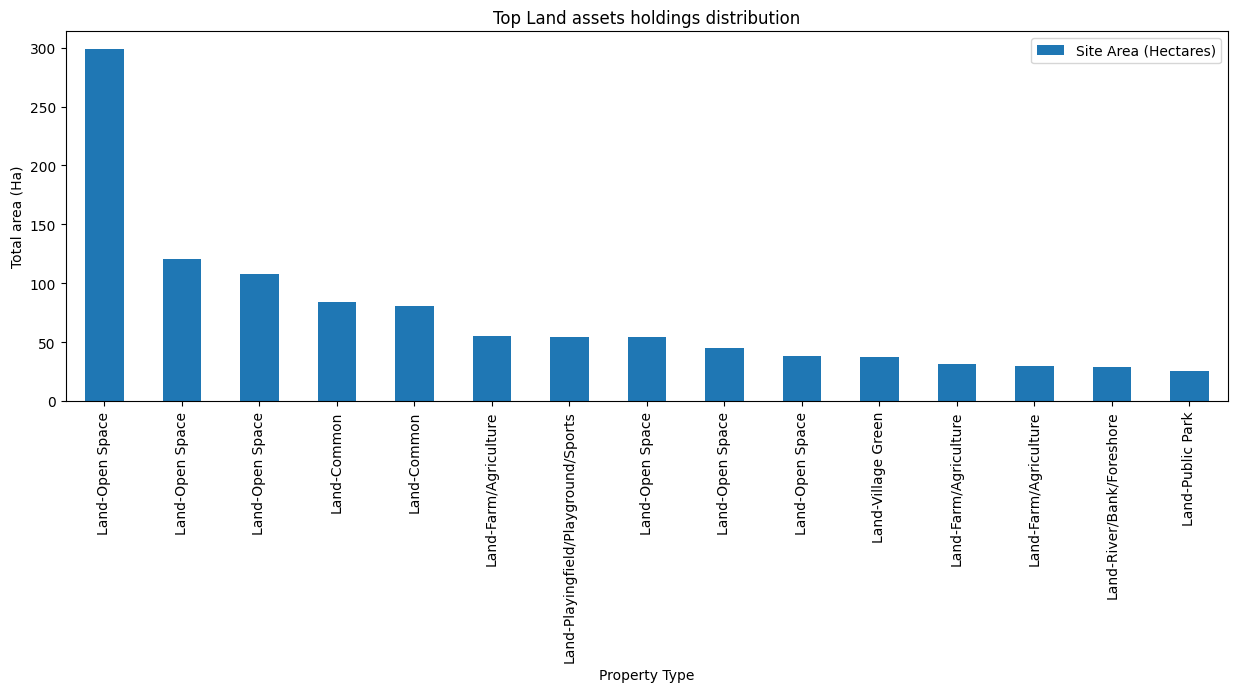

In [23]:
plt.figure().set_figwidth(15)
axes = plt.axes()
plt.title('Top Land assets holdings distribution')
plt.xlabel('Property Type')
plt.ylabel('Total area (Ha)')
axes.xaxis.set_tick_params(rotation=90)
df_pd.plot(x='Property Type', y='Site Area (Hectares)', legend=True, kind='bar', ax=axes)
plt.show()


# Problem 5
## For each of these grouped properties, what are the numbers of properties in each ‘tenure type’ recorded?


In [24]:
query = """
SELECT `Property Type`, `Tenure Type`, COUNT(*) AS Count
FROM BristolCouncilAssets
GROUP BY `Tenure Type`, `Property Type`
ORDER BY `Property Type` ASC, `Tenure Type` ASC
"""
spark.sql(query).show()

+--------------------+--------------------+-----+
|       Property Type|         Tenure Type|Count|
+--------------------+--------------------+-----+
| Access/Right Of Way|            Freehold|   20|
|Agricultural Buil...|            Freehold|    2|
|Block/Blocks Of F...|            Freehold|    1|
|      Bridge/Pontoon|            Freehold|   17|
|         Bus Shelter|            Freehold|    5|
|     Cafe/Restaurant|            Freehold|   25|
|     Cafe/Restaurant|  Freehold Reversion|    1|
|     Cafe/Restaurant|           Leasehold|    2|
|    Childrens Centre|  Education Acts Agt|    1|
|    Childrens Centre|            Freehold|    8|
|    Childrens Centre|           Leasehold|    6|
|    Childrens Centre|             Licence|    1|
|    Childrens Centre|Management Agreement|    1|
|    Childrens Centre|         User Rights|    4|
|     Childrens Homes|            Freehold|    8|
|     Childrens Homes|Management Agreement|    1|
|Church/Religious ...|  Education Acts Agt|    1|
